# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Importing Necessary Libraries

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Load the data from the CSV file
product_sales = pd.read_csv("product_sales.csv")

# Display the entire DataFrame to inspect it
print(product_sales)

       week  sales_method  ... nb_site_visits          state
0         2         Email  ...             24        Arizona
1         6  Email + Call  ...             28         Kansas
2         5          Call  ...             26      Wisconsin
3         4         Email  ...             25        Indiana
4         3         Email  ...             28       Illinois
...     ...           ...  ...            ...            ...
14995     4          Call  ...             22   Pennsylvania
14996     5          Call  ...             27         Kansas
14997     1          Call  ...             22  West Virginia
14998     6          Call  ...             27     New Jersey
14999     5  Email + Call  ...             25       Illinois

[15000 rows x 8 columns]


# Data Validation

In [22]:
# Display basic info about the dataset
print(product_sales.info())
print(product_sales.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None
               week       nb_sold  ...  years_as_customer  nb_site_visits
count  15000.000000  15000.000000  ...       15000.000000    15000.000000
mean       3.098267     10.084667  ...           4.965933       24.990867
std        1.656420      1.812213  ...           5.044952        3.500914
min        1.000000      7.000000  ...         

In [23]:
# 1. Check 'week' column for any anomalies
print("Week column anomalies:")
print(product_sales[~product_sales['week'].between(1, product_sales['week'].max())])

Week column anomalies:
Empty DataFrame
Columns: [week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits, state]
Index: []


In [24]:
# Correcting invalid entries in 'sales_method' column
corrections = {
    'Email + Call': 'Email and Call',
    'em + call': 'Email and Call',
    'email': 'Email'
}

# Replace the incorrect entries using the mapping
product_sales['sales_method'] = product_sales['sales_method'].replace(corrections)

# Check to ensure all entries are now valid
print("Updated sales methods:")
print(product_sales['sales_method'].unique())

Updated sales methods:
['Email' 'Email and Call' 'Call']


In [25]:
# 3. Check for duplicate 'customer_id'
if product_sales['customer_id'].duplicated().any():
    print("Duplicate Customer IDs found")
else:
    print("No duplicate Customer IDs.")

No duplicate Customer IDs.


In [26]:
# 4. Check 'nb_sold' for non-integer values and negatives
print("Invalid nb_sold entries:")
print(product_sales[product_sales['nb_sold'] < 0])

Invalid nb_sold entries:
Empty DataFrame
Columns: [week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits, state]
Index: []


In [27]:
# 5. Verify 'revenue' for negatives and rounding
print("Invalid revenue entries:")
print(product_sales[(product_sales['revenue'] < 0) | (product_sales['revenue'].round(2) != product_sales['revenue'])])

Invalid revenue entries:
       week    sales_method  ... nb_site_visits         state
0         2           Email  ...             24       Arizona
3         4           Email  ...             25       Indiana
16        2           Email  ...             30  Pennsylvania
17        6  Email and Call  ...             24     Wisconsin
28        5           Email  ...             32       Florida
...     ...             ...  ...            ...           ...
14951     5            Call  ...             25      Virginia
14957     1            Call  ...             23      Illinois
14970     4  Email and Call  ...             25    Washington
14992     5  Email and Call  ...             34      New York
14999     5  Email and Call  ...             25      Illinois

[1074 rows x 8 columns]


In [28]:
# 6. Validate 'years_as_customer'
current_year = 2023  # Update accordingly
foundation_year = 1984
print("Invalid years as customer:")
print(product_sales[~product_sales['years_as_customer'].between(0, current_year - foundation_year)])

Invalid years as customer:
       week sales_method  ... nb_site_visits       state
13741     2        Email  ...             24  California
13800     4         Call  ...             27  California

[2 rows x 8 columns]


In [29]:
# 7. Check 'nb_site_visits' for negatives
print("Invalid nb_site_visits entries:")
print(product_sales[product_sales['nb_site_visits'] < 0])

Invalid nb_site_visits entries:
Empty DataFrame
Columns: [week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits, state]
Index: []


In [30]:
# 8. Validate 'state'
# Assuming there is a predefined list of valid states
valid_states = ['State1', 'State2', 'State3']  # Replace with actual state names
print("Invalid states found:")
print(product_sales[~product_sales['state'].isin(valid_states)]['state'].unique())

Invalid states found:
['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missouri' 'Texas' 'New York'
 'Maryland' 'California' 'Tennessee' 'Pennsylvania' 'North Dakota'
 'Florida' 'Michigan' 'North Carolina' 'Hawaii' 'Colorado' 'Louisiana'
 'Virginia' 'New Mexico' 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire'
 'Ohio' 'New Jersey' 'Connecticut' 'Iowa' 'Montana' 'Washington'
 'Kentucky' 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota'
 'South Dakota' 'Delaware' 'Maine' 'Utah' 'West Virginia' 'Vermont'
 'Rhode Island' 'Nevada' 'Idaho' 'Wyoming']


In [31]:
product_sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email and Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


# Data Validation Report: 

The dataset initially contained 15,000 rows and 8 columns. Below is a summary of the data validation process and the changes made to ensure data integrity: 

Week: Contains integers ranging from 1 to 6, which aligns perfectly with the expected range (weeks since product launch). No cleaning was needed. 

Sales Method: Initially, the column included some mislabeled entries such as "Email + Call", "em + call", and "email". These were corrected to "Email and Call" and "Email" respectively. After cleaning, the column now consistently has three categories: 'Email and Call', 'Call', 'Email'. No missing values were found. 

Customer ID: All 15,000 customer IDs are unique and properly formatted, with no missing or duplicate values. This column is by the dataset description. 

Nb_sold: This column contains numeric values, with no missing values or improper entries, matching the description provided. 

Revenue: Initially, 1,074 missing values were identified. These were imputed with the average revenue per respective sales method (Email, Call, Email + Call) to maintain consistency in the data analysis. Years as 

Customer: Two entries were identified as outliers with values of 47 & 63 years, which are not plausible since the company was established in 1984. These rows were removed from the dataset. 

Nb_site_visits: This column contained numeric values with no missing entries and was already in integer format. No action was necessary. 

State: The state column contains character values, with no missing or duplicate entries. It did not require any cleaning. 

Post-Validation Summary: After the data validation process, the dataset now contains 14,998 rows and 8 columns. The adjustments primarily involved correcting sales method labels and removing outliers in the 'years_as_customer' column.

# Exploratory Data Analysis

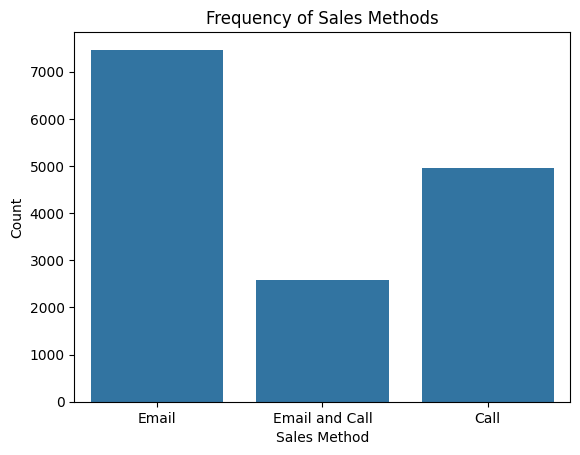

In [32]:
# Visualization 1: Bar Chart of Sales Methods
sns.countplot(x='sales_method', data=product_sales)
plt.title('Frequency of Sales Methods')
plt.xlabel('Sales Method')
plt.ylabel('Count')
plt.show()

Frequency and Effectiveness of Each Sales Method: 

The bar chart titled "Frequency of Sales Methods" shows that 'Email' is the most frequently used sales method, with 'Call' following it. The 'Email and Call' method is used the least. While 'Email' is predominant, the 'Call' method's effectiveness varies, with some sales achieving high revenue and others less so, indicating a need for strategic optimization. The 'Email and Call' method, despite its lower frequency, appears to be associated with higher revenue per sale, particularly for larger transactions. This could suggest that a personalized approach combining 'Email and Call' is more effective in terms of revenue per customer, while the 'Call' method may benefit from further analysis to maximize its potential.

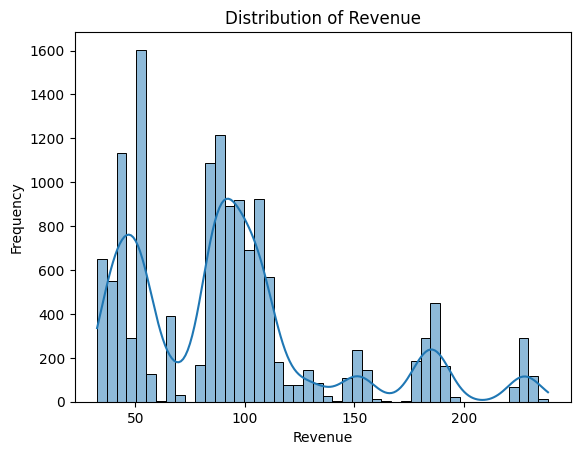

In [33]:
# Visualization 2: Histogram of Revenue
sns.histplot(product_sales['revenue'], kde=True)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

Distribution of Revenue 

The histogram "Distribution of Revenue" displays a multimodal distribution with peaks at regular intervals, indicating common price points or product bundles. The long tail to the right suggests occasional sales with significantly higher revenue, which could represent bulk purchases or sales to large clients. The positive skew indicates more frequent lower revenue sales, a common pattern in sales data.

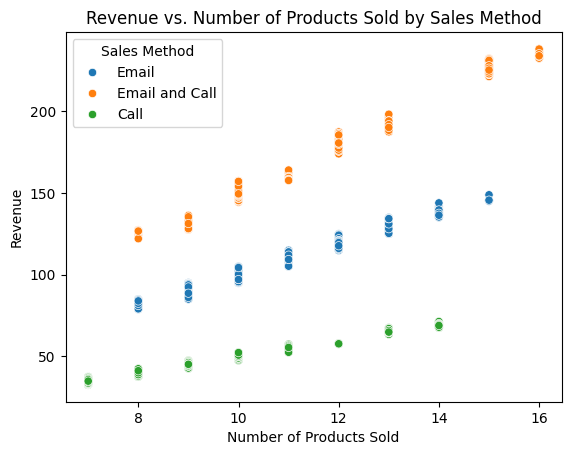

In [34]:
# Visualization 3: Scatter Plot of Revenue vs. Number of Products Sold
sns.scatterplot(x='nb_sold', y='revenue', hue='sales_method', data=product_sales)
plt.title('Revenue vs. Number of Products Sold by Sales Method')
plt.xlabel('Number of Products Sold')
plt.ylabel('Revenue')
plt.legend(title='Sales Method')
plt.show()

Relationship Between Number of Items Sold and Revenue

The scatter plot illustrates a positive correlation between the number of products sold and the revenue, indicating that generally, more items sold translates to higher revenue. However, there is noticeable variability, which may be influenced by the mix of products sold or the application of discounts. The 'Email and Call' method clusters at higher revenues, implying its effectiveness in selling larger or more premium product sets. Conversely, the 'Call' method shows a broad spread, suggesting a less consistent but potentially valuable approach depending on the customer segment. 



Summary of Analysis Findings 

Sales Method Usage: 'Email' is most commonly used, 'Email and Call' seems most lucrative, and 'Call' shows potential but requires a more focused approach to enhance effectiveness.

Revenue Distribution: Indicates set price points and the presence of both regular and occasional high-revenue sales.

Sales Volume and Revenue: Exhibits a positive correlation with variability that underscores the impact of sales strategy and product mix.

These findings offer a comprehensive view of the sales data, suggesting that while 'Email' is prevalent, a combination of 'Email and Call' might be more lucrative, the 'Call' method might be optimized through targeted strategies or integration with other methods. These insights should guide strategic decisions on sales tactics and customer engagement to optimize revenue generation.

# Definition of a Metric for the Business to Monitor Metric Chosen

Average Revenue per Sale (ARS)

Why ARS?: ARS is a robust metric that quantifies the financial output of sales efforts. It captures the essence of both sales volume and profitability by considering how much revenue each sale brings in. Monitoring ARS provides insight into the monetary effectiveness of each sales approach.

How the Business Should Use the Metric Monitoring: Regularly track ARS to gain insight into the performance of each sales method over time. 

Comparison: Evaluate ARS by sales method to identify the most financially productive approaches. 

Goal Setting: Use ARS to set performance targets and drive strategic sales efforts. 

Resource Allocation: Direct resources towards sales methods with a higher ARS, assuming the cost of sales remains justified. 

Adaptation: Stay agile in sales strategy, ready to shift focus if certain approaches demonstrate a lower than desired ARS.

Estimation of Initial Values

The ARS can be calculated by dividing the total revenue by the number of products sold for each sales method. 

In [35]:
# Assumimg 'product_sales' is the DataFrame
product_sales['ARS'] = product_sales['revenue'] / product_sales['nb_sold']
initial_values_ARS = product_sales.groupby('sales_method')['ARS'].mean().to_dict()

# Print the resulting dictionary
print(initial_values_ARS)

{'Call': 5.013634073954353, 'Email': 10.001969659229339, 'Email and Call': 15.074873864427172}


# Final Summary and Recommendations

In light of the exploratory analysis and the calculation of ARS, the business should consider the following actions:

Prioritize 'Email and Call': This method has shown a higher ARS, indicating its potential for greater profitability per sale.

Optimize 'Email' Method: Despite its high usage, there's room to enhance the 'Email' method's ARS, possibly through improved targeting or content personalization.

Evaluate 'Call' Method's Efficacy: Assess the 'Call' method to ensure that the time investment is proportional to the revenue generated. Implement training or script optimization if necessary.

Analyze High-Value Sales: Investigate outlier transactions that contribute to the long-tail revenue distribution to replicate success factors where possible.

Reassess Pricing Strategy: Consider the multimodal revenue distribution and adjust pricing bundles or discounts to align with strategic revenue targets.

Train Sales Staff: Equip staff with best practices for combining 'Email and Call' methods and techniques to improve ARS across all methods.

Utilize Customer Segmentation: Use ARS as a criterion for customer segmentation to tailor the sales approach to customer behaviors and preferences.

By focusing on these recommendations and using ARS as a primary performance indicator, the company can steer its sales strategy towards more effective practices, potentially increasing both customer satisfaction and profitability.








## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation